# Global Warming Interactive Dashboard

In [1]:
# importing libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [2]:
climate_df = pd.read_csv("https://raw.githubusercontent.com/dnzengou/my-green-recommender/main/data/climate_change.csv")

In [3]:
globalwarming_df = pd.read_csv("https://raw.githubusercontent.com/dnzengou/my-green-recommender/main/data/GlobalLandTemperaturesByCountry.csv")

In [4]:
climate_df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [5]:
globalwarming_df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [6]:
globalwarming_clean=globalwarming_df.dropna()

globalwarming_clean.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [7]:
# total number of co2, ch4, aerosols and temp increased globally
co2_total = int(climate_df['CO2'].sum())
ch4_total = int(climate_df['CH4'].sum())
aerosols_total = int(climate_df['Aerosols'].sum())
temp_total = int(climate_df['Temp'].sum())

In [8]:
#country = globalwarming_clean['Country'].unique()

# total number of country and average temperature
#globalwarming_mean = int(globalwarming_clean['AverageTemperature'].mean())
#country_total = int(globalwarming_clean['Country'].sum())

In [9]:
# displaying the total stats
## background-color: #504e4e

display(HTML("<div style = 'background-color: #e5e5e5; padding: 30px '>" +
             "<span style='color: #255399; font-size:30px;'> CO2: <b>"  + str(co2_total) +"</b></span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> CH4: <b>" + str(ch4_total) + "</b></span>"+
             "<span style='color: darkgreen; font-size:30px; margin-left:20px;'> Aerosols: <b>" + str(aerosols_total) + "</b></span>"+
             "<span style='color: darkgreen; font-size:30px; margin-left:20px;'> Temp: <b>" + str(temp_total) + "</b></span>"+
             "</div>")
       )

# Average temperature by countries

## Enter number of countries you want the data for

In [10]:
sorted_country = globalwarming_clean.sort_values('AverageTemperature', ascending= False)

In [11]:
sorted_country.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
210796,1898-02-01,-36.738,2.992,Greenland
143034,1868-02-01,-36.830,5.977,Denmark
211035,1918-01-01,-37.177,4.248,Greenland
210507,1874-01-01,-37.413,3.883,Greenland
210436,1868-02-01,-37.658,6.111,Greenland


In [12]:
# sorting the values by confirmed descednding order
# country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlightcol(x):
    r = 'background-color: red'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 1] = r
    
    return df1

def show_latest_increase(n):
    n = int(n)
    return sorted_country.sort_values('AverageTemperature', ascending= False).head(n).style.apply(highlightcol, axis=None)

interact(show_latest_increase, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

# Slide to check for the worst hit countries

In [13]:
countries = globalwarming_clean['Country'].unique()

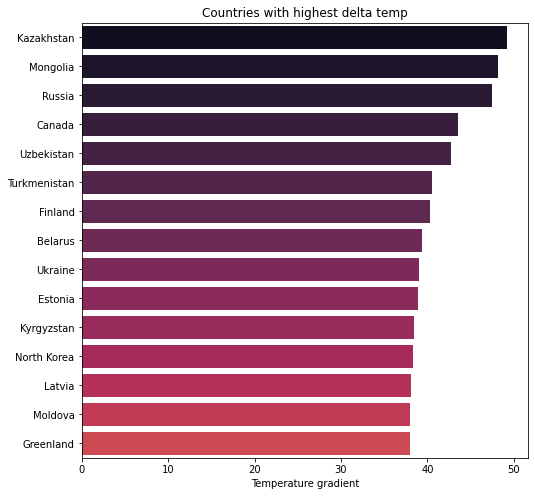

In [14]:
max_min_list = []

# getting max and min temps
for country in countries:
    curr_temps = globalwarming_clean[globalwarming_clean['Country'] == country]['AverageTemperature']
    max_min_list.append((curr_temps.max(), curr_temps.min()))
    
# nan cleaning
res_max_min_list = []
res_countries = []

for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        res_max_min_list.append(max_min_list[i])
        res_countries.append(countries[i])

# calc differences        
differences = []

for tpl in res_max_min_list:
    differences.append(tpl[0] - tpl[1])
    
# sorting
differences, res_countries = (list(x) for x in zip(*sorted(zip(differences, res_countries), key=lambda pair: pair[0], reverse=True)))

# ploting
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:15], y=res_countries[:15], palette=sns.color_palette("rocket", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature gradient", title="Countries with highest delta temp")

In [15]:
# # plotting the 10 worst hit countries

def bubblechart(n):
    fig = px.scatter(sorted_country.head(n), x="Country", y="AverageTemperature", size="AverageTemperatureUncertainty", color="Country",
               hover_name="Country", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Average Temperature",
    width = 700
    )
    fig.show();

interact(bubblechart, n=100)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=100, description='n', max=300, min=-100), Output()), _dom_classes=('widg…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …